In [1]:
import pandas as pd
df = pd.read_csv("./python_job.txt", sep="\t")
df.head(100)

,职位,薪资,工作经验,学历要求
0,少儿编程讲师-Java/python,0.8-1.2万/月,在校生/应届生,本科
1,Python开发工程师,0.8-1.2万/月,1年经验,本科
2,python开发工程师,1.2-1.6万/月,1年经验,本科
3,Python教研/教学主任,1-1.5万/月,3-4年经验,本科
4,德企招Python 全栈工程师,1-1.5万/月,2年经验,本科
...,...,...,...,...
95,少儿编程讲师-java/web/python,0.8-1万/月,在校生/应届生,本科
96,计算机视觉算法工程师（python）(002083),1.5-2万/月,无需经验,本科
97,运维工程师（驻场银行）,0.9-1.3万/月,2年经验,本科
98,测试工程师,1-1.5万/月,3-4年经验,本科


In [2]:
def compute_xinzi(x):
    if "万/月" in x: 
        low,high = x.replace("万/月", "").split("-")
        return 10000*(float(high)+float(low))/2
    if "千/月" in x: 
        low,high = x.replace("千/月", "").split("-")
        return 1000*(float(high)+float(low))/2
    if "万/年" in x: 
        low,high = x.replace("万/年", "").split("-")
        return 10000*(float(high)+float(low))/2/12
df["xinzi"] = df["薪资"].map(compute_xinzi)

In [4]:
df.head(5)

,职位,薪资,工作经验,学历要求,xinzi
0,少儿编程讲师-Java/python,0.8-1.2万/月,在校生/应届生,本科,10000.0
1,Python开发工程师,0.8-1.2万/月,1年经验,本科,10000.0
2,python开发工程师,1.2-1.6万/月,1年经验,本科,14000.0
3,Python教研/教学主任,1-1.5万/月,3-4年经验,本科,12500.0
4,德企招Python 全栈工程师,1-1.5万/月,2年经验,本科,12500.0


In [5]:
df = df[df["xinzi"]<100000]

/Users/peishuaishuai/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


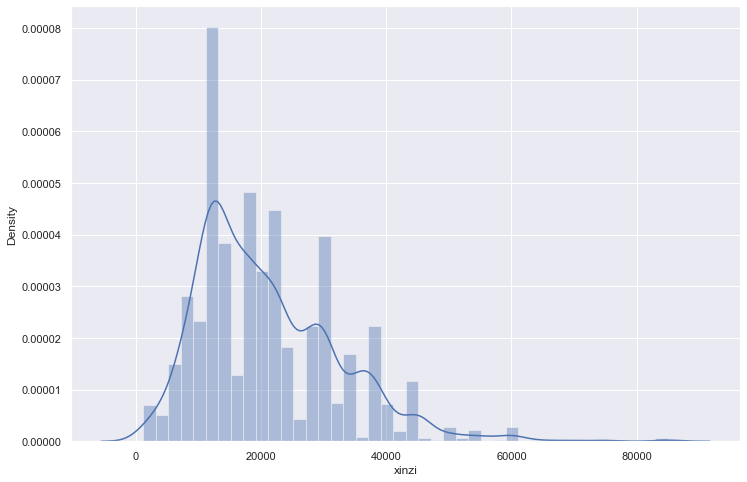

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use({'figure.figsize':(12, 8)})

sns.set_theme();
sns.distplot(df["xinzi"])

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
sns.set(font='SimHei')


In [18]:
import matplotlib

In [20]:
myfont = matplotlib.font_manager.FontProperties(fname="/Library/Fonts/Arial Unicode.ttf")#"/Library/Fonts/Songti.ttc")

sns.set(font=myfont.get_name())



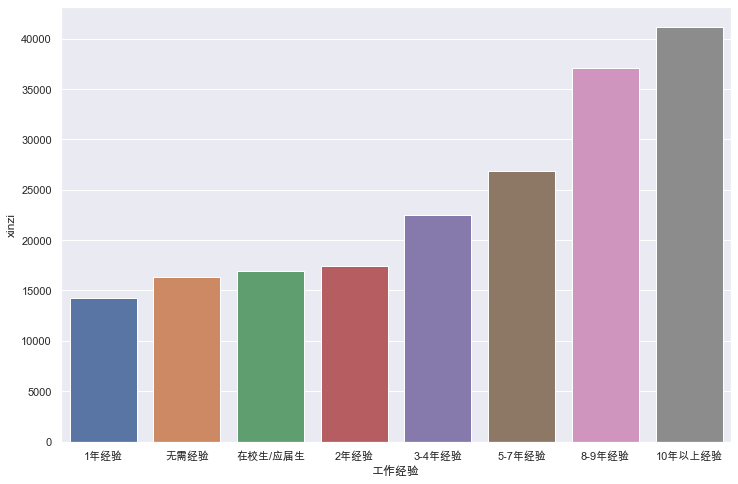

In [24]:
result = df.groupby("工作经验")["xinzi"].mean().reset_index()
result.sort_values(by="xinzi", inplace=True)
sns.barplot(x="工作经验", y="xinzi", data=result)

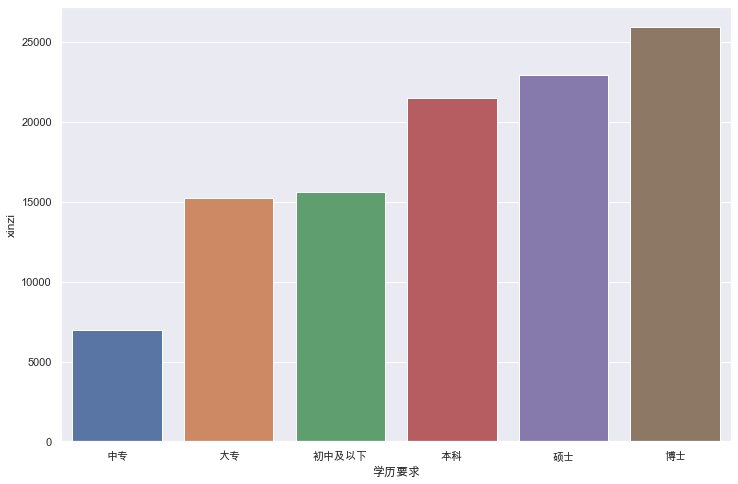

In [25]:
result = df.groupby("学历要求")["xinzi"].mean().reset_index()
result.sort_values(by="xinzi", inplace=True)
sns.barplot(x="学历要求", y="xinzi", data=result)